In [1]:
import numpy as np
import matplotlib.pyplot as plt

To find the values of $a$ and $b$ that minimize the Mean Squared Error (MSE) cost function for the linear equation $y = ax + b$, we can use gradient descent. The MSE is given by:

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - (ax_i + b))^2
$$

To minimize the MSE, we compute the partial derivatives with respect to $a$ and $b$:

$$
\frac{\partial MSE}{\partial a} = \frac{-2}{N} \sum_{i=1}^{N} x_i(y_i - (ax_i + b))
$$

$$
\frac{\partial MSE}{\partial b} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - (ax_i + b))
$$

The gradient descent algorithm updates the parameters $a$ and $b$ in the direction opposite to the gradient of the cost function, scaled by a learning rate $L$:

$$
a = a - L \cdot \frac{\partial MSE}{\partial a}
$$

$$
b = b - L \cdot \frac{\partial MSE}{\partial b}
$$

Thus, the direction of the gradient descent is given by:

$$
- L \cdot \left( \frac{\partial MSE}{\partial a}, \frac{\partial MSE}{\partial b} \right)
$$

This iterative process continues until the MSE is minimized, yielding the optimal values for $a$ and $b$.


In [2]:
class Linear_regression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None # a
        self.bias = None # b

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            da = (-2/n_samples) * np.dot(X.T, (y - y_predicted))
            db = (-2/n_samples) * np.sum(y - y_predicted)


            self.weights -= self.lr * da
            self.bias -= self.lr * db
    
    def mse(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted)**2)
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

MSE: 388.59


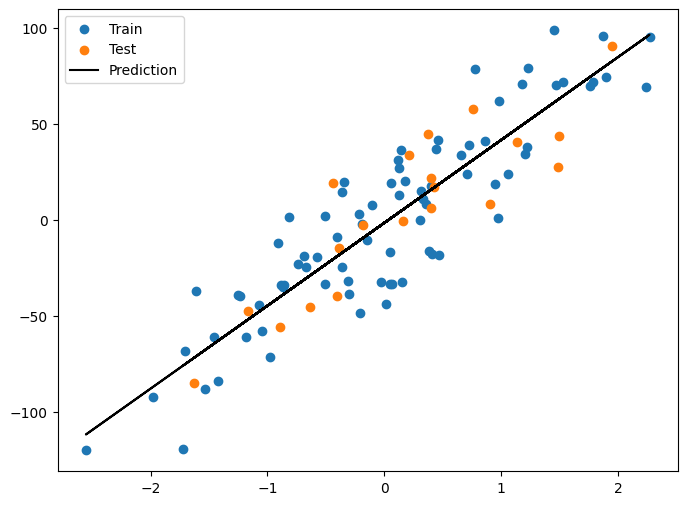

In [4]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = Linear_regression(lr = 0.1)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
mse_value = regressor.mse(y_test, predicted)
print('MSE:', np.round(mse_value, 2))

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize = (8, 6))
m1 = plt.scatter(X_train, y_train, label = 'Train')
m2 = plt.scatter(X_test, y_test, label = 'Test')
plt.plot(X, y_pred_line, color = 'black', label = 'Prediction')
plt.legend()
plt.show()